In [32]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
df= pd.read_csv('Admission_Predict.csv')


In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.isnull().count()

Serial No.           400
GRE Score            400
TOEFL Score          400
University Rating    400
SOP                  400
LOR                  400
CGPA                 400
Research             400
Chance of Admit      400
dtype: int64

In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
df = df.rename(columns={'Serial No.':'id', 'GRE Score' : 'gre','TOEFL Score': 'toefl', 'University Rating':'uni_rating', 'SOP':'sop', 'LOR ':'lor', 'CGPA': 'cgpa', 'Research':'research','Chance of Admit ': 'admit_odds'})
df.head()

,id,gre,toefl,uni_rating,sop,lor,cgpa,research,admit_odds
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df['accepted'] = df['admit_odds'] > 0.74
df['accepted']= df['accepted'] == True
df.head()

,id,gre,toefl,uni_rating,sop,lor,cgpa,research,admit_odds,accepted
0,1,337,118,4,4.5,4.5,9.65,1,0.92,True
1,2,324,107,4,4.0,4.5,8.87,1,0.76,True
2,3,316,104,3,3.0,3.5,8.00,1,0.72,False
3,4,322,110,3,3.5,2.5,8.67,1,0.80,True
4,5,314,103,2,2.0,3.0,8.21,0,0.65,False


In [8]:
df['accepted'] = df['accepted'].astype(int)

In [9]:
df.head()

,id,gre,toefl,uni_rating,sop,lor,cgpa,research,admit_odds,accepted
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0


In [10]:
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

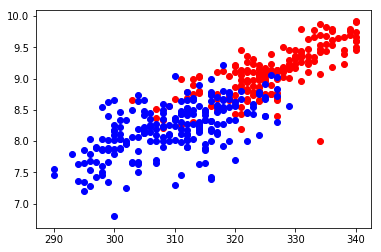

In [11]:
plt.scatter(df[df['accepted']==1].gre,
           df[df['accepted']== 1].cgpa,
           color='red')

plt.scatter(df[df['accepted'] == 0].gre,
           df[df['accepted']== 0].cgpa,
           color= 'blue')
plt.show()

In [12]:
df1 = df[['gre', 'cgpa', 'accepted']]
df1.head()

,gre,cgpa,accepted
0,337,9.65,1
1,324,8.87,1
2,316,8.00,0
3,322,8.67,1
4,314,8.21,0


In [13]:
x= df1[['gre','cgpa']]
y=df.accepted

In [14]:
x_train,x_test, y_train,y_test = train_test_split(x,y, random_state =0, test_size=0.2)   

In [15]:
import math 
math.sqrt(len(y_test))

8.94427190999916

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =15)

In [55]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test =sc_x.fit_transform(x_test)

In [56]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [57]:
predict=knn.predict(x_test)
print(accuracy_score(y_test,predict))

0.875


In [58]:
knn.score(x_test, y_test)

0.875

In [59]:
cv_scores = cross_val_score(knn,x, y, cv=5)

In [60]:
print(cv_scores)
print(np.mean(cv_scores))

[0.85   0.8125 0.9    0.8125 0.9125]
0.8574999999999999


In [51]:
from sklearn.model_selection import GridSearchCV
knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1,25)}
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
knn_gscv.fit(x,y)
    

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [53]:
knn_gscv.best_params_

{'n_neighbors': 15}

In [61]:
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

In [65]:
regr = linear_model.LinearRegression()
p = df['admit_odds']
l = df[['gre','cgpa']]
regr.fit(l, p)

print(regr.coef_)
print(regr.intercept_)
print(regr.score(l,p))

[0.00305067 0.15994862]
-1.617512569192258
0.7810684887220863


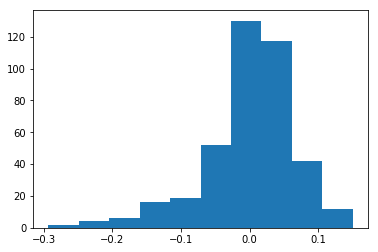

In [71]:
predictr = regr.predict(l).ravel()
actual = df['admit_odds']
residual = actual - predictr

plt.hist(residual)
plt.show()

For my two models I used a simple Linar regression model and Knn classifier. The data set that was used was Graduate school admissions for Indian students. The data set had 8 features: GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research, Chance of Admitance. Using the GRE scores and Undergraduate GPA score, the algorythems would predict weather a student would be accepted to the college. These two features tend to have a big effect on the acceptance rate, and both were able to use these features. The difference between the models is that for Knn, I converted the acceptance rate into numaric True (accepted) False (not accepted) values. A person with an acceptance rate of .75 or higher was considered accepted, anything other were considard not accepted. For the Simple Regression model I used acceptance rates as floats.

# KNN
This Model I used it because of the balanced demographics. Race doesnt play an issue and the data seemed to be very fair. I started off pliting the data into train test splitts with K=5. The model worked fairly well, but I figured I could imporve it. To improve the KNN classifier, I took the square root of the total number of rows in the test set minus 1(i subtracted one from the square root because the squre root was an even number). After getting an accuracy score, I attempted to improve the classifer more by increasing the value of K. Eventually implemented an algorythem that suggested the best number to use for K. 

# OLS 

This model was used to predit the chance of acceptence using the same features as the Knn model. After creating the model, I checked the accuracy several different ways. I used corss validation, acuracy score, and an R score. 
